In [1]:
import os 
import sys

## Ising Hamiltonian

## cn0

In [2]:
Ni = range(2,21,2)

Ising_normal = [[] for _ in range(1,11)]
Ising_MM = [[] for _ in range(1, 11)]
for i in range(1,11):
    path = os.path.abspath(os.path.join("Ising_Results", "cn0_itr2_Ising_normal{}.txt".format(i)))
    with open(path, 'r') as f:
        for line in f.readlines()[1:]:
            words = line.split()
            n = int(words[0])//2 - 1
            Ising_normal[n].append(float(words[1]))
            
    path = os.path.abspath(os.path.join("Ising_Results", "cn0_itr2_Ising_MM{}.txt".format(i)))
    with open(path, 'r') as f:
        for line in f.readlines()[1:]:
            words = line.split()
            n = int(words[0])//2 - 1
            Ising_MM[n].append(float(words[1]))

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
from matplotlib.ticker import MultipleLocator, FormatStrFormatter

yn = np.array([np.mean(Ising_normal[i]) for i in range(10)])
yn_std = np.array([np.std(Ising_normal[i]) for i in range(10)])
ym = np.array([np.mean(Ising_MM[i]) for i in range(10)])
ym_std = np.array([np.std(Ising_MM[i]) for i in range(10)])


S = []
for i in range(10):
    S.append(100*(yn[i] - ym[i])/yn[i])


def func(x, a, b, c):
    return a*x*x + b*x + c  

popt, pcov = scipy.optimize.curve_fit(func, Ni, S)
r_popt = np.round(popt,2)

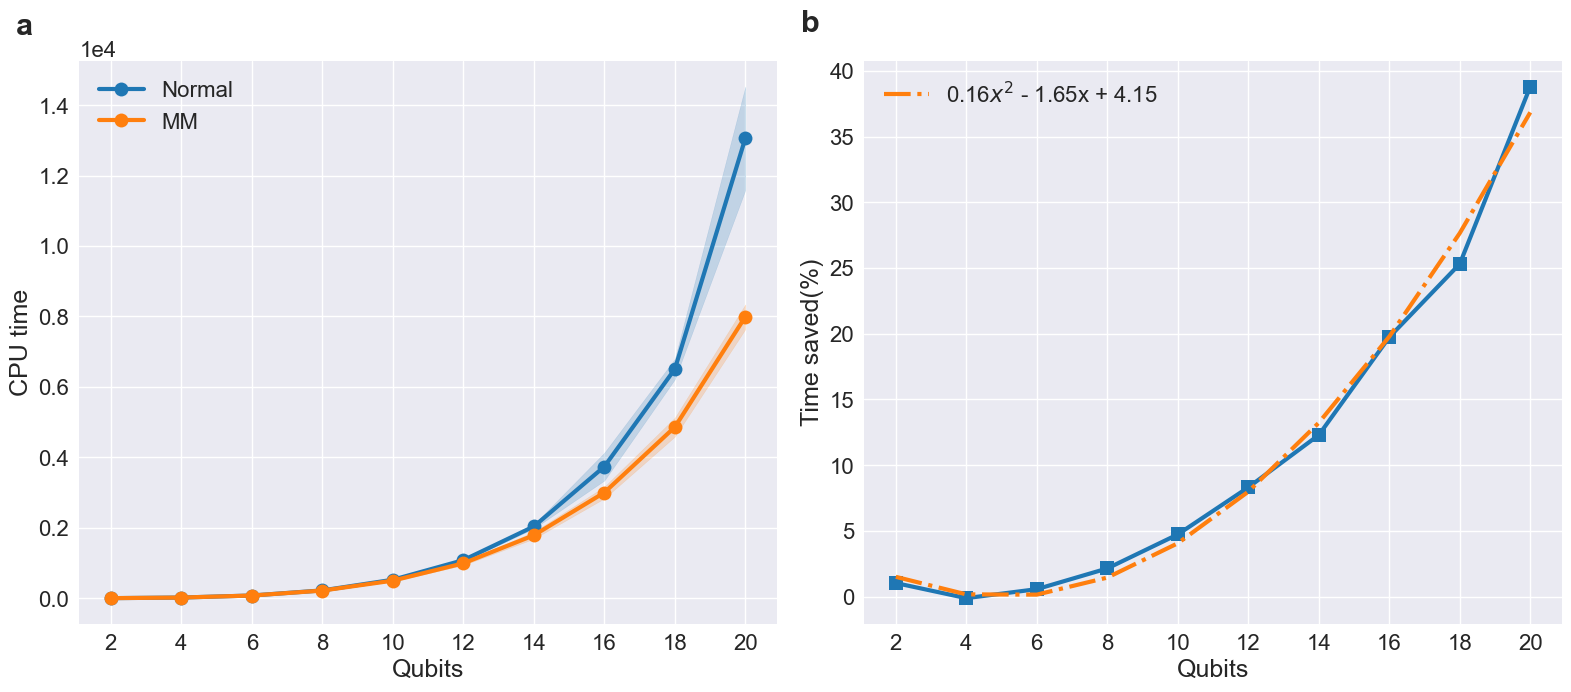

In [28]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,7.2))
plt.style.use("seaborn")
#settings
plt.rc('font', size=16) #controls default text size
plt.rc('axes', titlesize=16) #fontsize of the title
plt.rc('axes', labelsize=18) #fontsize of the x and y labels
plt.rc('xtick', labelsize=16) #fontsize of the x tick labels
plt.rc('ytick', labelsize=16) #fontsize of the y tick labels
plt.rc('legend', fontsize=16) #fontsize of the legend


ax1.text(-0.7, 1.6e4, 'a', fontsize=22, fontweight='bold')
ax1.plot(Ni, yn, label="Normal", marker='o', ms=10, c="tab:blue", linewidth=3)
ax1.fill_between(Ni, yn-yn_std, yn+yn_std, alpha=0.2, color="tab:blue")
ax1.plot(Ni, ym, label="MM", marker='o',ms=10, c="tab:orange",linewidth=3)
ax1.fill_between(Ni, ym-ym_std, ym+ym_std, alpha=0.2, color="tab:orange")

ax1.set(xlabel ="Qubits", ylabel="CPU time")
ax1.ticklabel_format(style='sci', scilimits=(-1,2), axis='y')


ax1.set_xticks(Ni) 
ax1.legend(loc='upper left')
#plt.title("Ising Hamiltonian")


ax2.text(-0.7, 43, 'b', fontsize=22, fontweight='bold')
ax2.plot(Ni, S, marker='s', ms=10, c='tab:blue', linewidth=3)
ax2.plot(Ni, func(Ni, *popt), linestyle='dashdot', linewidth=3,
        c='tab:orange', label='{}$x^2$ - {}x + {}'.format(r_popt[0], abs(r_popt[1]), r_popt[2]))

ax2.set(xlabel ="Qubits", ylabel="Time saved(%)")
#plt.title("Time saved(%)")
ax2.set_xticks(Ni) 
ax2.legend(loc='upper left')

plt.tight_layout()
plt.show()
fig.savefig(os.path.join("Figures", "ISING_with_TimeSaved.pdf"), dpi=1200)

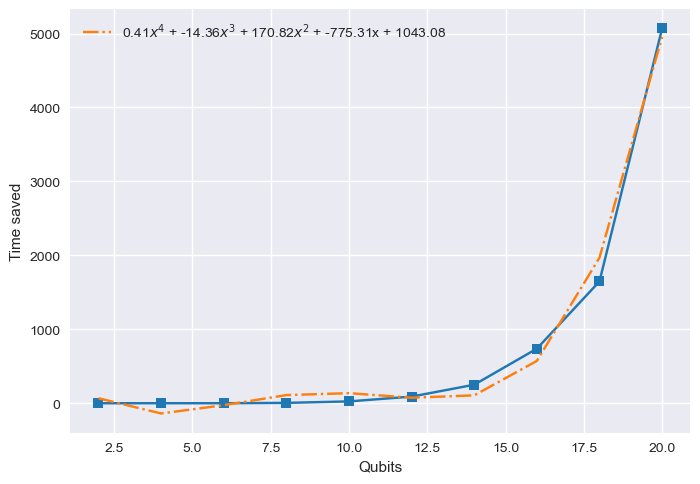

In [5]:
S = []
for i in range(10):
    S.append((yn[i] - ym[i]))


#def func(x, a, b, c):
#    return a*np.exp(b*x) + c  
def func(x, a, b, c, d ,e):
    return a*x*x*x*x + b*x*x*x + c*x*x + d*x + e

popt, pcov = scipy.optimize.curve_fit(func, Ni, S)
r_popt = np.round(popt,2)


with sns.axes_style("darkgrid"):    
    plt.plot(Ni, S, marker='s', c='tab:blue')
    plt.plot(Ni, func(Ni, *popt), linestyle='dashdot', c='tab:orange',
             label='{}$x^4$ + {}$x^3$ + {}$x^2$ + {}x + {}'.format(r_popt[0], r_popt[1],
                                                                   r_popt[2], r_popt[3],r_popt[4]))
    #plt.title("Time saved(%)")
    plt.ylabel("Time saved")
    plt.xlabel("Qubits")
    plt.legend()
    plt.show()
#fig.savefig(os.path.join("Figures", "ISING_DIFF.eps"))

## Molecular Hamiltonian

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
mol = ['H2', 'H4', 'LiH', 'H2O']
N = np.array([4, 8, 12, 14])


QWC_normal = [[] for _ in N]
QWC_MM = [[] for _ in N]
for i in range(1,11):
    path = os.path.abspath(os.path.join("Molecule_Results", "cn0_Molecular_QWC_normal{}.txt".format(i)))
    with open(path, 'r') as f:
        j = 0
        for line in f.readlines()[1:]:
            words = line.split()
            QWC_normal[j].append(float(words[2]))
            j += 1
    
    path = os.path.abspath(os.path.join("Molecule_Results", "cn0_Molecular_QWC_MM{}.txt".format(i)))
    with open(path, 'r') as f:
        j = 0
        for line in f.readlines()[1:]:
            words = line.split()
            QWC_MM[j].append(float(words[2]))
            j += 1

GC_normal = [[] for _ in N]
GC_MM = [[] for _ in N]
for i in range(1,11):
    path = os.path.abspath(os.path.join("Molecule_Results", "cn0_Molecular_GC_normal{}.txt".format(i)))
    with open(path, 'r') as f:
        j = 0
        for line in f.readlines()[1:]:
            words = line.split()
            GC_normal[j].append(float(words[2]))
            j += 1
    
    path = os.path.abspath(os.path.join("Molecule_Results", "cn0_Molecular_GC_MM{}.txt".format(i)))
    with open(path, 'r') as f:
        j = 0
        for line in f.readlines()[1:]:
            words = line.split()
            GC_MM[j].append(float(words[2]))
            j += 1
            
FG_normal = [[] for _ in N]
FG_MM = [[] for _ in N]
for i in range(1,11):
    path = os.path.abspath(os.path.join("Molecule_Results", "Molecular_FG_normal{}.txt".format(i)))
    with open(path, 'r') as f:
        j = 0
        for line in f.readlines()[1:]:
            words = line.split()
            FG_normal[j].append(float(words[2]))
            j += 1
    
    path = os.path.abspath(os.path.join("Molecule_Results", "Molecular_FG_MM{}.txt".format(i)))
    with open(path, 'r') as f:
        j = 0
        for line in f.readlines()[1:]:
            words = line.split()
            FG_MM[j].append(float(words[2]))
            j += 1

yn1 = np.array([np.mean(QWC_normal[i]) for i in range(4)])
yn_std1 = np.array([np.std(QWC_normal[i]) for i in range(4)])
ym1 = np.array([np.mean(QWC_MM[i]) for i in range(4)])
ym_std1 = np.array([np.std(QWC_MM[i]) for i in range(4)])

yn2 = np.array([np.mean(GC_normal[i]) for i in range(4)])
yn_std2 = np.array([np.std(GC_normal[i]) for i in range(4)])
ym2 = np.array([np.mean(GC_MM[i]) for i in range(4)])
ym_std2 = np.array([np.std(GC_MM[i]) for i in range(4)])

yn3 = np.array([np.mean(FG_normal[i]) for i in range(4)])
yn_std3 = np.array([np.std(FG_normal[i]) for i in range(4)])
ym3 = np.array([np.mean(FG_MM[i]) for i in range(4)])
ym_std3 = np.array([np.std(FG_MM[i]) for i in range(4)])

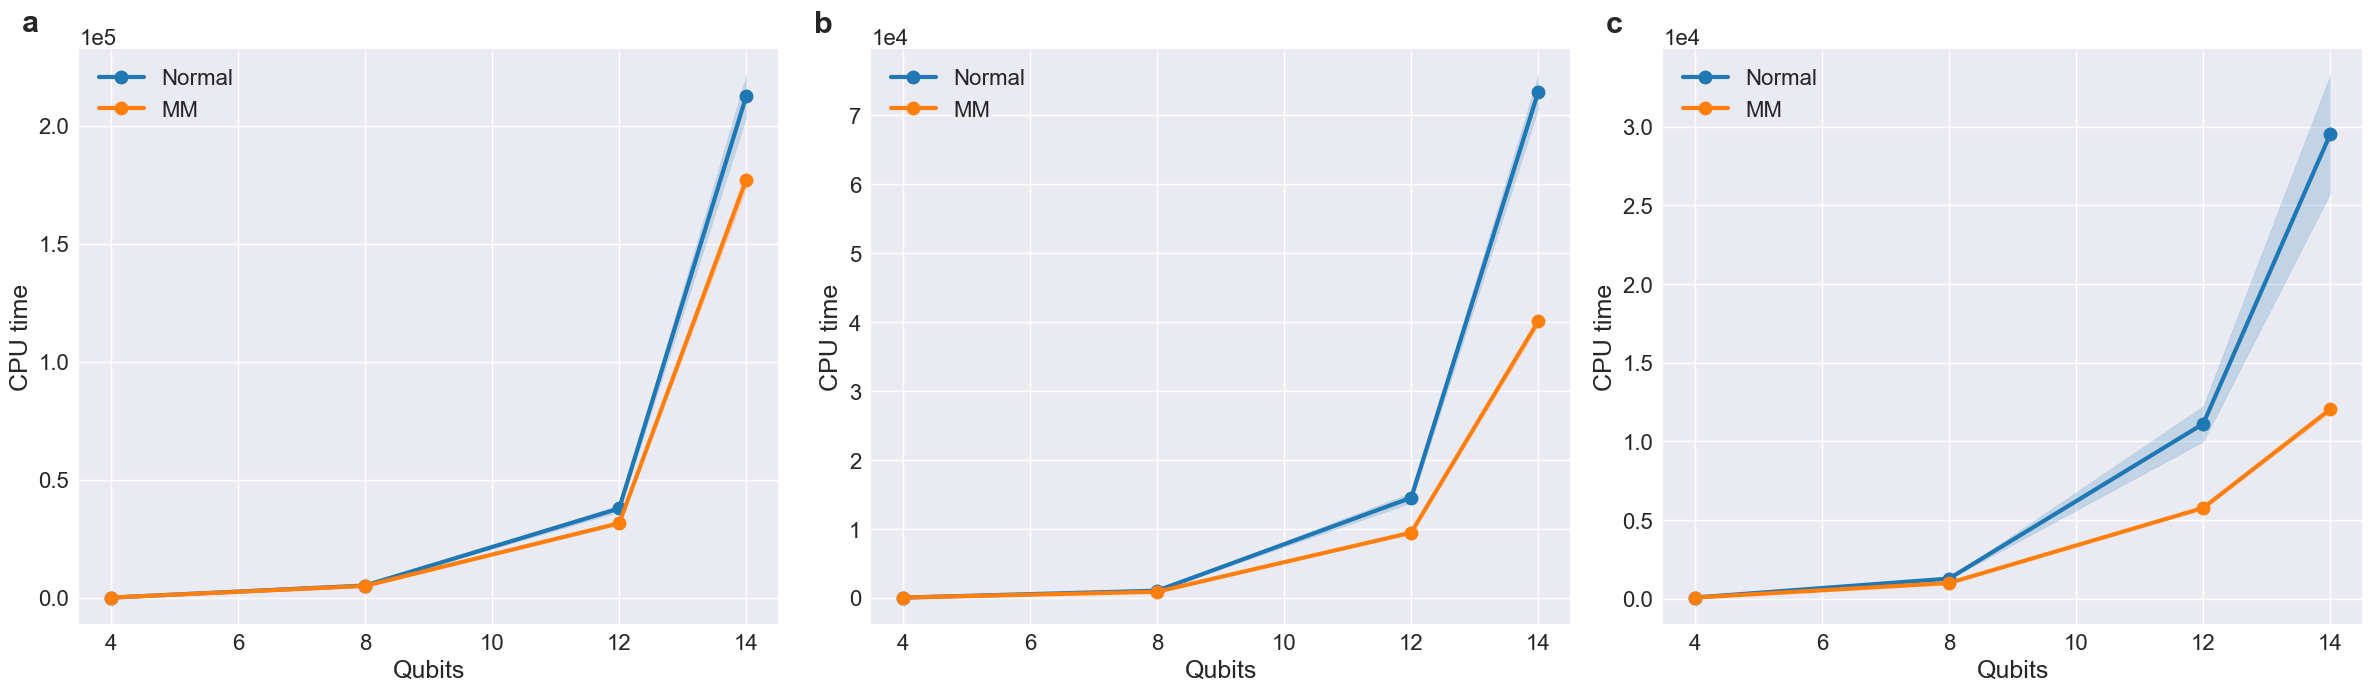

In [62]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,7.2))
plt.style.use("seaborn")
#settings
plt.rc('font', size=16) #controls default text size
plt.rc('axes', titlesize=16) #fontsize of the title
plt.rc('axes', labelsize=18) #fontsize of the x and y labels
plt.rc('xtick', labelsize=16) #fontsize of the x tick labels
plt.rc('ytick', labelsize=16) #fontsize of the y tick labels
plt.rc('legend', fontsize=16) #fontsize of the legend

ax1.text(2.6, 2.4e5, 'a', fontsize=22, fontweight='bold')
ax1.plot(N, yn1, label="Normal", marker='o', ms=10, color="tab:blue", linewidth=3)
ax1.fill_between(N, yn1-yn_std1, yn1+yn_std1, color="tab:blue", alpha=0.2)
ax1.plot(N, ym1, label="MM", marker='o', ms=10, color="tab:orange",linewidth=3)
ax1.fill_between(N, ym1-ym_std1, ym1+ym_std1, color="tab:orange", alpha=0.2)
ax1.set(xlabel ="Qubits", ylabel="CPU time")
ax1.ticklabel_format(style='sci', scilimits=(-1,2), axis='y')
ax1.legend(loc='upper left')

ax2.text(2.6, 8.2e4, 'b', fontsize=22, fontweight='bold')
ax2.plot(N, yn2, label="Normal", marker='o', ms=10, color="tab:blue", linewidth=3)
ax2.fill_between(N, yn2-yn_std2, yn2+yn_std2, color="tab:blue", alpha=0.2)
ax2.plot(N, ym2, label="MM", marker='o', ms=10, color="tab:orange",linewidth=3)
ax2.fill_between(N, ym2-ym_std2, ym2+ym_std2, color="tab:orange", alpha=0.2)
ax2.set(xlabel ="Qubits", ylabel="CPU time")
ax2.ticklabel_format(style='sci', scilimits=(-1,2), axis='y')
ax2.legend(loc='upper left')

ax3.text(2.6, 3.6e4, 'c', fontsize=22, fontweight='bold')
ax3.plot(N, yn3, label="Normal", marker='o', ms=10, color="tab:blue", linewidth=3)
ax3.fill_between(N, yn3-yn_std3, yn3+yn_std3, color="tab:blue", alpha=0.2)
ax3.plot(N, ym3, label="MM", marker='o', ms=10, color="tab:orange",linewidth=3)
ax3.fill_between(N, ym3-ym_std3, ym3+ym_std3, color="tab:orange", alpha=0.2)
ax3.set(xlabel ="Qubits", ylabel="CPU time")
ax3.ticklabel_format(style='sci', scilimits=(-1,2), axis='y')
ax3.legend(loc='upper left')

plt.tight_layout()
plt.show()
#fig.savefig(os.path.join("Figures", "MOL_ALL.pdf"), dpi=1200)

### 1. QWC

In [62]:
mol = ['H2', 'H4', 'LiH', 'H2O']
N = np.array([4, 8, 12, 14])


QWC_normal = [[] for _ in N]
QWC_MM = [[] for _ in N]
for i in range(1,11):
    path = os.path.abspath(os.path.join("Molecule_Results", "cn0_Molecular_QWC_normal{}.txt".format(i)))
    with open(path, 'r') as f:
        j = 0
        for line in f.readlines()[1:]:
            words = line.split()
            QWC_normal[j].append(float(words[2]))
            j += 1
    
    path = os.path.abspath(os.path.join("Molecule_Results", "cn0_Molecular_QWC_MM{}.txt".format(i)))
    with open(path, 'r') as f:
        j = 0
        for line in f.readlines()[1:]:
            words = line.split()
            QWC_MM[j].append(float(words[2]))
            j += 1
            
GC_normal = [[] for _ in N]
GC_MM = [[] for _ in N]
for i in range(1,11):
    path = os.path.abspath(os.path.join("Molecule_Results", "cn0_Molecular_GC_normal{}.txt".format(i)))
    with open(path, 'r') as f:
        j = 0
        for line in f.readlines()[1:]:
            words = line.split()
            GC_normal[j].append(float(words[2]))
            j += 1
    
    path = os.path.abspath(os.path.join("Molecule_Results", "cn0_Molecular_GC_MM{}.txt".format(i)))
    with open(path, 'r') as f:
        j = 0
        for line in f.readlines()[1:]:
            words = line.split()
            GC_MM[j].append(float(words[2]))
            j += 1

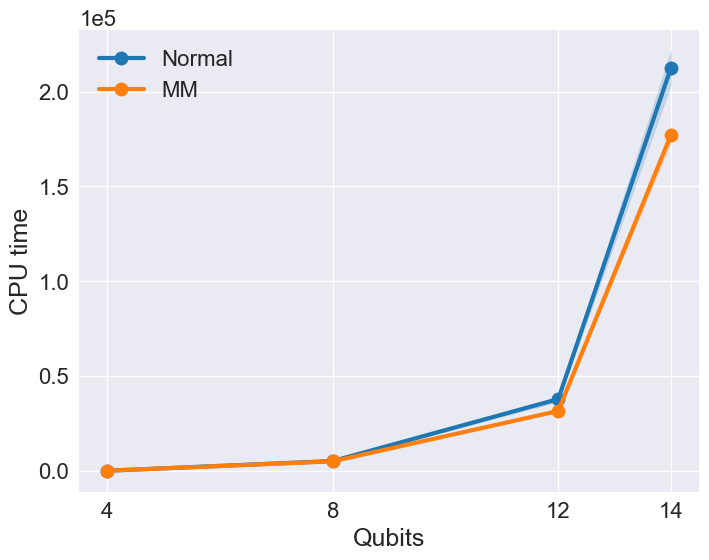

In [65]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

yn = np.array([np.mean(QWC_normal[i]) for i in range(4)])
yn_std = np.array([np.std(QWC_normal[i]) for i in range(4)])
ym = np.array([np.mean(QWC_MM[i]) for i in range(4)])
ym_std = np.array([np.std(QWC_MM[i]) for i in range(4)])


fig, ax = plt.subplots(figsize=(8,6))
plt.style.use("seaborn")
#settings
plt.rc('font', size=12) #controls default text size
plt.rc('axes', titlesize=16) #fontsize of the title
plt.rc('axes', labelsize=18) #fontsize of the x and y labels
plt.rc('xtick', labelsize=16) #fontsize of the x tick labels
plt.rc('ytick', labelsize=16) #fontsize of the y tick labels
plt.rc('legend', fontsize=16) #fontsize of the legend

ax.plot(N, yn, label="Normal", marker='o', ms=10, color="tab:blue", linewidth=3)
ax.fill_between(N, yn-yn_std, yn+yn_std, color="tab:blue", alpha=0.2)
ax.plot(N, ym, label="MM", marker='o', ms=10, color="tab:orange",linewidth=3)
ax.fill_between(N, ym-ym_std, ym+ym_std, color="tab:orange", alpha=0.2)

ax.set(xlabel ="Qubits", ylabel="CPU time")
ax.ticklabel_format(style='sci', scilimits=(-1,2), axis='y')

plt.xticks(N) 
plt.legend(loc='upper left')
#plt.title("QWC Molecular Hamiltonian")
plt.show()
#fig.savefig(os.path.join("Figures", "MOL_QWC.pdf"), dpi=1200)

In [31]:
S_qwc = []
for i in range(4):
    S_qwc.append(100*(yn[i] - ym[i])/yn[i])

### 2.GC

In [66]:
mol = ['H2', 'H4', 'LiH', 'H2O']
N = np.array([4, 8, 12, 14])


GC_normal = [[] for _ in N]
GC_MM = [[] for _ in N]
for i in range(1,11):
    path = os.path.abspath(os.path.join("Molecule_Results", "cn0_Molecular_GC_normal{}.txt".format(i)))
    with open(path, 'r') as f:
        j = 0
        for line in f.readlines()[1:]:
            words = line.split()
            GC_normal[j].append(float(words[2]))
            j += 1
    
    path = os.path.abspath(os.path.join("Molecule_Results", "cn0_Molecular_GC_MM{}.txt".format(i)))
    with open(path, 'r') as f:
        j = 0
        for line in f.readlines()[1:]:
            words = line.split()
            GC_MM[j].append(float(words[2]))
            j += 1

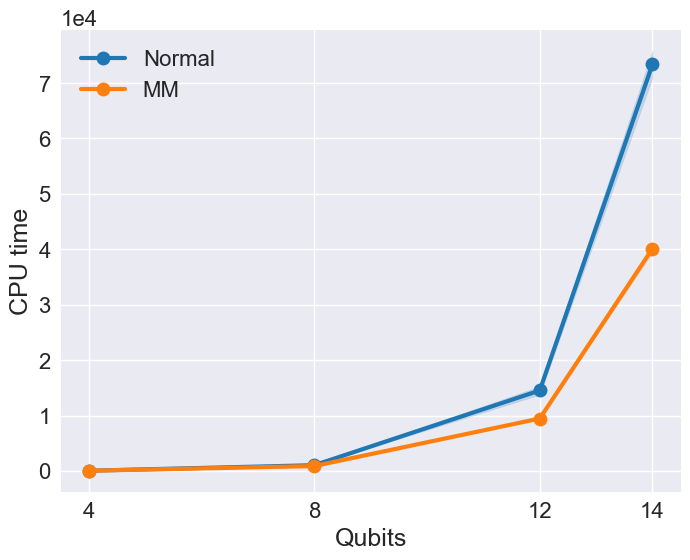

In [69]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

yn = np.array([np.mean(GC_normal[i]) for i in range(4)])
yn_std = np.array([np.std(GC_normal[i]) for i in range(4)])
ym = np.array([np.mean(GC_MM[i]) for i in range(4)])
ym_std = np.array([np.std(GC_MM[i]) for i in range(4)])


fig, ax = plt.subplots(figsize=(8,6))
plt.style.use("seaborn")
#settings
plt.rc('font', size=12) #controls default text size
plt.rc('axes', titlesize=16) #fontsize of the title
plt.rc('axes', labelsize=18) #fontsize of the x and y labels
plt.rc('xtick', labelsize=16) #fontsize of the x tick labels
plt.rc('ytick', labelsize=16) #fontsize of the y tick labels
plt.rc('legend', fontsize=16) #fontsize of the legend

ax.plot(N, yn, label="Normal", marker='o', ms=10, color="tab:blue", linewidth=3)
ax.fill_between(N, yn-yn_std, yn+yn_std, color="tab:blue", alpha=0.2)
ax.plot(N, ym, label="MM", marker='o', ms=10, color="tab:orange",linewidth=3)
ax.fill_between(N, ym-ym_std, ym+ym_std, color="tab:orange", alpha=0.2)

ax.set(xlabel ="Qubits", ylabel="CPU time")
ax.ticklabel_format(style='sci', scilimits=(-1,2), axis='y')

plt.xticks(N) 
plt.legend(loc='upper left')
#plt.title("GC Molecular Hamiltonian")
plt.show()
fig.savefig(os.path.join("Figures", "MOL_GC.pdf"), dpi=1200)

In [36]:
S_gc = []
for i in range(4):
    S_gc.append(100*(yn[i] - ym[i])/yn[i])

### 3.FG

In [70]:
mol = ['H2', 'H4', 'LiH', 'H2O']
N = np.array([4, 8, 12, 14])


FG_normal = [[] for _ in N]
FG_MM = [[] for _ in N]
for i in range(1,11):
    path = os.path.abspath(os.path.join("Molecule_Results", "Molecular_FG_normal{}.txt".format(i)))
    with open(path, 'r') as f:
        j = 0
        for line in f.readlines()[1:]:
            words = line.split()
            FG_normal[j].append(float(words[2]))
            j += 1
    
    path = os.path.abspath(os.path.join("Molecule_Results", "Molecular_FG_MM{}.txt".format(i)))
    with open(path, 'r') as f:
        j = 0
        for line in f.readlines()[1:]:
            words = line.split()
            FG_MM[j].append(float(words[2]))
            j += 1

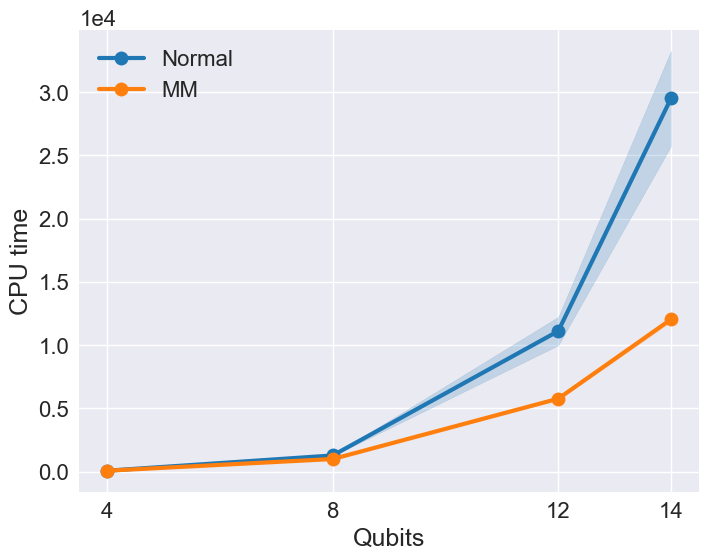

In [73]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

yn = np.array([np.mean(GC_normal[i]) for i in range(4)])
yn_std = np.array([np.std(GC_normal[i]) for i in range(4)])
ym = np.array([np.mean(GC_MM[i]) for i in range(4)])
ym_std = np.array([np.std(GC_MM[i]) for i in range(4)])


fig, ax = plt.subplots(figsize=(8,6))
plt.style.use("seaborn")
#settings
plt.rc('font', size=12) #controls default text size
plt.rc('axes', titlesize=16) #fontsize of the title
plt.rc('axes', labelsize=18) #fontsize of the x and y labels
plt.rc('xtick', labelsize=16) #fontsize of the x tick labels
plt.rc('ytick', labelsize=16) #fontsize of the y tick labels
plt.rc('legend', fontsize=16) #fontsize of the legend

ax.plot(N, yn, label="Normal", marker='o', ms=10, color="tab:blue", linewidth=3)
ax.fill_between(N, yn-yn_std, yn+yn_std, color="tab:blue", alpha=0.2)
ax.plot(N, ym, label="MM", marker='o', ms=10, color="tab:orange",linewidth=3)
ax.fill_between(N, ym-ym_std, ym+ym_std, color="tab:orange", alpha=0.2)

ax.set(xlabel ="Qubits", ylabel="CPU time")
ax.ticklabel_format(style='sci', scilimits=(-1,2), axis='y')

plt.xticks(N) 
plt.legend(loc='upper left')
#plt.title("GC Molecular Hamiltonian")
plt.show()
#fig.savefig(os.path.join("Figures", "MOL_FG.pdf"), dpi=1200)

In [41]:
S_fg = []
for i in range(4):
    S_fg.append(100*(yn[i] - ym[i])/yn[i])

## Compare

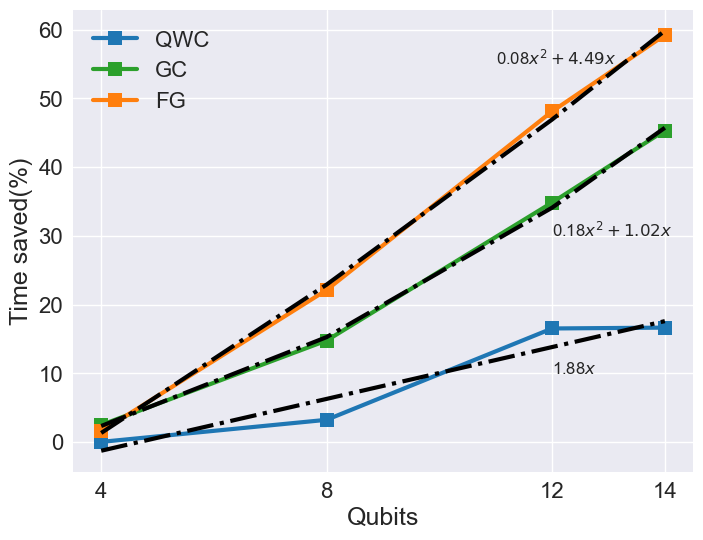

In [76]:
import scipy

def func(x, a, b):
    return a*x + b 

def func2(x, a, b, c):
    return a*N*N + b*N + c


p_qwc, pcov = scipy.optimize.curve_fit(func, N, S_qwc)
rp_qwc = np.round(p_qwc, 2)
p_gc, pcov = scipy.optimize.curve_fit(func2, N, S_gc)
rp_gc = np.round(p_gc, 2)
p_fg, pcov = scipy.optimize.curve_fit(func2, N, S_fg)
rp_fg = np.round(p_fg, 2)


fig, ax = plt.subplots(figsize=(8,6))
plt.style.use("seaborn")
#settings
plt.rc('font', size=12) #controls default text size
plt.rc('axes', titlesize=16) #fontsize of the title
plt.rc('axes', labelsize=18) #fontsize of the x and y labels
plt.rc('xtick', labelsize=16) #fontsize of the x tick labels
plt.rc('ytick', labelsize=16) #fontsize of the y tick labels
plt.rc('legend', fontsize=16) #fontsize of the legend

ax.plot(N, S_qwc, color="tab:blue", marker='s', ms=10, label='QWC', linewidth=3)
ax.plot(N, S_gc, color="tab:green", marker='s', ms=10, label='GC', linewidth=3)
ax.plot(N, S_fg, color="tab:orange", marker='s', ms=10, label='FG', linewidth=3)
ax.plot(N, func(N, *p_qwc), linestyle='dashdot', linewidth=3, c='black')
ax.plot(N, func2(N, *p_gc), linestyle='dashdot', linewidth=3, c='black')
ax.plot(N, func2(N, *p_fg), linestyle='dashdot', linewidth=3, c='black')
    
plt.text(12, 10, '{}$x$'.format(rp_qwc[0]))
plt.text(12, 30, '{}$x^2+{}x$'.format(rp_gc[0], rp_gc[1]))
plt.text(11, 55, '{}$x^2+{}x$'.format(rp_fg[0], rp_fg[1]))
#plt.title("Time saved(%)")
plt.xticks(N) 
plt.legend()
plt.ylabel("Time saved(%)")
plt.xlabel("Qubits")
plt.show()
#fig.savefig(os.path.join("Figures", "MOL_TimeSaved.pdf"), dpi=1200)